pdo_to_pdx p-value= 0.02622938783485702


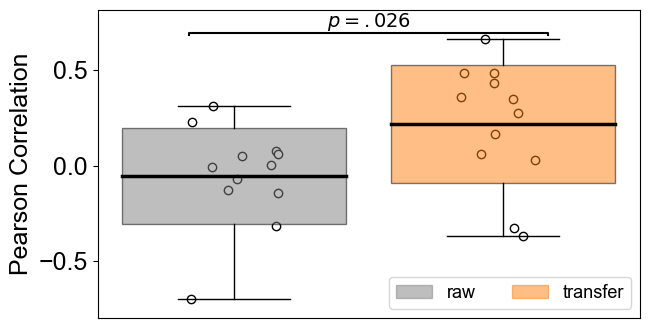

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import mannwhitneyu ## for those wonderful p-values!

## Nature journal settings
plt.rcParams["font.family"] = "Arial"
colors = ["#E64B35FF", "#3C5488FF", "#00A087FF", "#4DBBD5FF", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]
sns.set_palette(sns.color_palette(colors))

fn = "pdx_expt/analysis/results.csv"
df = pd.read_csv(fn)
df.head()

## Generate some fake data.
dataset_names = ["pdo_to_pdx"]
previous = "raw_pearson"
ours = "transfer_pearson"
method_names = [previous, ours]

## Get those p-values!
for dataset in dataset_names:
    sub_df = df[(df["dataset"]==dataset)]
    print(dataset, "p-value=", mannwhitneyu(sub_df[previous], sub_df[ours]).pvalue)

plt.rcParams.update({"font.size":18}) ## Set fontsize

## Make the box plots
comp_colors = ['tab:gray', 'tab:orange']
fig, ax = plt.subplots(figsize=(7,4))
stats = []
positions = []
curr_pos = 0

# save x, y values for dots
x_prev = None
y_prev = None
x_ours = None
y_ours = None

for dataset in dataset_names:
    for method in method_names:
        v = df[(df["dataset"]==dataset)][method]
        mu = np.mean(v)
        stdv = np.std(v)
        stats.append({"med":mu,           ## This is the line drawn in the box plot
                      "q1":mu-stdv,       ## This is the lower extent of the box plot
                      "q3":mu+stdv,       ## This is the upper extent of the box plot
                      "whislo":np.min(v), ## This is the lower extent of the whiskers
                      "whishi":np.max(v)})## This is the upper extent of the whiskers
        x_vec = curr_pos + np.random.uniform(-1, 1, size=len(v))
        y_vec = v
        ax.scatter(x=x_vec, ## Randomly scatter the points horizontally
                   y=y_vec, 
                   color='white', 
                   edgecolors="black", 
                   zorder=-1)  ## zorder=-1 places the points behind the boxes
        # save x,y values
        if method == previous:
            x_prev = x_vec
            y_prev = y_vec
        elif method == ours:
            x_ours = x_vec
            y_ours = y_vec
    
        positions.append(curr_pos)
        curr_pos += 6
    curr_pos += 5

## Actual code to plot
bplot = ax.bxp(stats, 
               positions=positions, 
               widths=5, 
               showfliers=False, 
               medianprops=dict(linestyle='-', linewidth=2.5, color='black'), 
               patch_artist=True, 
               zorder=0)

## Go through the boxes and set color + transparency
for i, patch in enumerate(bplot['boxes']):
    patch.set_facecolor(comp_colors[i%len(method_names)])
    patch.set_alpha(0.5)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.ylabel("Pearson Correlation")
plt.ylim(np.min(df[previous])-0.1, np.max(df[ours])+0.15)


## Plot those p-values!
h = 0.01
p_values = ["$p=.026$"] 
for i, dataset in enumerate(dataset_names):
    sub_df = df[(df["dataset"]==dataset)]
    y = np.max(sub_df[ours])+0.02
    x1, x2 = positions[2*i]-1, positions[2*i + 1]+1
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='k')
    plt.text((x1+x2)*.5, y+h, p_values[i], ha='center', va='bottom',color='k', fontsize=14)

patch1 = mpatches.Patch(color=comp_colors[0], alpha=0.5, label="raw")
patch2 = mpatches.Patch(color=comp_colors[1], alpha=0.5, label="transfer")

plt.legend(handles=[patch1, patch2], ncol=2, fontsize=13, loc='lower right')
plt.savefig('plots/pdx-box-plot.png', bbox_inches='tight')

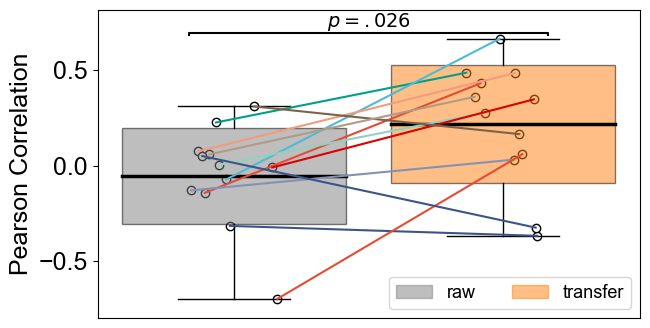

In [2]:
## Make the box plots
comp_colors = ['tab:gray', 'tab:orange']
fig, ax = plt.subplots(figsize=(7,4))
stats = []
positions = []
curr_pos = 0

# save x, y values for dots
x_prev = None
y_prev = None
x_ours = None
y_ours = None

for dataset in dataset_names:
    for method in method_names:
        v = df[(df["dataset"]==dataset)][method]
        mu = np.mean(v)
        stdv = np.std(v)
        stats.append({"med":mu,           ## This is the line drawn in the box plot
                      "q1":mu-stdv,       ## This is the lower extent of the box plot
                      "q3":mu+stdv,       ## This is the upper extent of the box plot
                      "whislo":np.min(v), ## This is the lower extent of the whiskers
                      "whishi":np.max(v)})## This is the upper extent of the whiskers
        x_vec = curr_pos + np.random.uniform(-1, 1, size=len(v))
        y_vec = v
        ax.scatter(x=x_vec, ## Randomly scatter the points horizontally
                   y=y_vec, 
                   color='white', 
                   edgecolors="black", 
                   zorder=-1)  ## zorder=-1 places the points behind the boxes
        # save x,y values
        if method == previous:
            x_prev = x_vec
            y_prev = y_vec
        elif method == ours:
            x_ours = x_vec
            y_ours = y_vec
    
        positions.append(curr_pos)
        curr_pos += 6
    curr_pos += 5

## Actual code to plot
bplot = ax.bxp(stats, 
               positions=positions, 
               widths=5, 
               showfliers=False, 
               medianprops=dict(linestyle='-', linewidth=2.5, color='black'), 
               patch_artist=True, 
               zorder=0)

## Go through the boxes and set color + transparency
for i, patch in enumerate(bplot['boxes']):
    patch.set_facecolor(comp_colors[i%len(method_names)])
    patch.set_alpha(0.5)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.ylabel("Pearson Correlation")
plt.ylim(np.min(df[previous])-0.1, np.max(df[ours])+0.15)

## Plot those p-values!
h = 0.01
p_values = ["$p=.026$"] 
for i, dataset in enumerate(dataset_names):
    sub_df = df[(df["dataset"]==dataset)]
    y = np.max(sub_df[ours])+0.02
    x1, x2 = positions[2*i]-1, positions[2*i + 1]+1
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='k')
    plt.text((x1+x2)*.5, y+h, p_values[i], ha='center', va='bottom',color='k', fontsize=14)

patch1 = mpatches.Patch(color=comp_colors[0], alpha=0.5, label="raw")
patch2 = mpatches.Patch(color=comp_colors[1], alpha=0.5, label="transfer")

plt.legend(handles=[patch1, patch2], ncol=2, fontsize=13, loc='lower right')

X = np.transpose(np.vstack((np.array(x_prev), np.array(x_ours))))
Y = np.transpose(np.vstack((np.array(y_prev), np.array(y_ours))))

assert X.shape == Y.shape
for i in range(0, len(X)):
    plt.plot(X[i,:], Y[i,:], '-')
    
plt.savefig('plots/full-pdx-box-plot.png', bbox_inches='tight')

In [7]:
ydiff = Y[:, 1] - Y[:, 0]

In [9]:
print(np.mean(ydiff))
print(np.median(ydiff))

0.27110755619578714
0.2868267621892438


In [10]:
print(np.min(ydiff))
print(np.max(ydiff))

-0.3739281885836675
0.7557282626180436


In [14]:
np.mean(Y[:, 1]) - np.mean(Y[:, 0])

0.27110755619578714

In [13]:
np.mean(Y[:, 0])

-0.053710145731098856